<a href="https://colab.research.google.com/github/jeffreygalle/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 NUMERICAL ERROR AND INSTABILITY


Accuracy: Measures how closely an integration technique approximates an exact solution of the ODE. The accuracy depends on the step size (denoted as h) and it's quantified using the notation O(h^p), where p is the power to which the step size is raised. O(h^p=) indicates how the error decreases as the step size gets smaller.

Stability: Stability is how well an integration technique can prevent growth of errors over time. If a technique allows the errors to remain constant or diminish as it progresses, it is considered stable. If errors increase, the scheme is unstable. Stability depends on the choice of h, some techniques may be stable for certain h values and unstable for others.

Implicit and Explicit Techniques: Implicit methods involve solving equations to find the next step, often have better stability at the cost of more complex computations. Explicit methods compute the next step directly, are generally easier to implement but require smaller step sizes for them to remain stable.



<ipython-input-2-18ebfa4a3f13>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


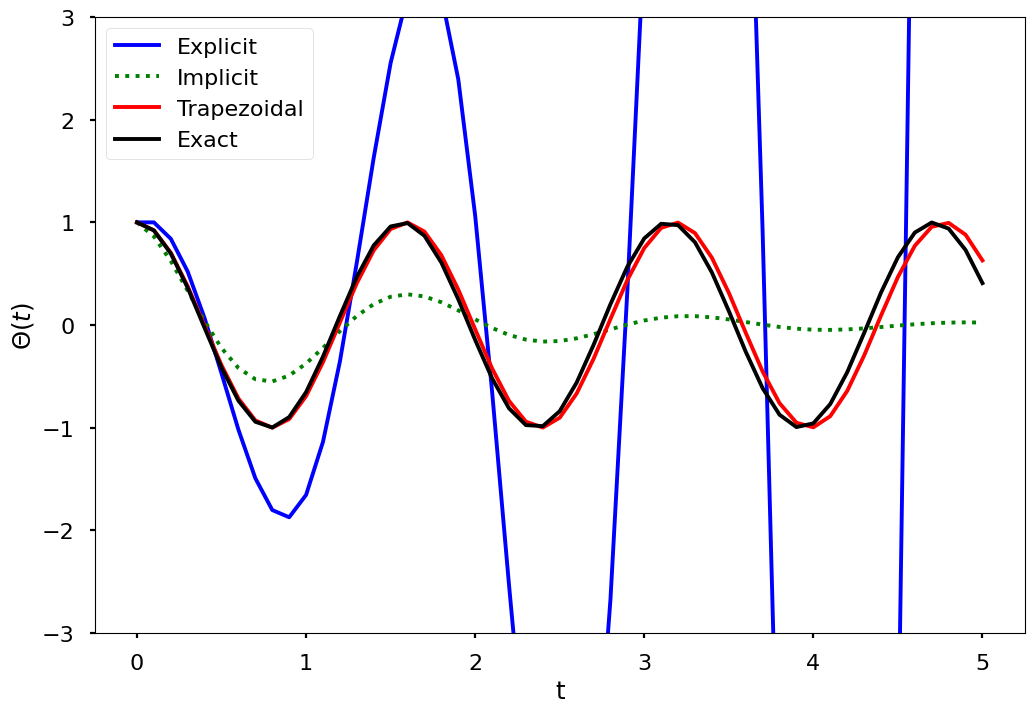

In [2]:
# Example: Use the explicit and implicit Euler, as well as trapezoidal, formulas to solve
# the pen- dulum equation over the time interval [0, 5] in increments of 0.1, and
# for an initial solution of S0 = [1 0] . For the model parameters using
# sqrt(8/l)=4  plot the approximate solution on a single graph.

import numpy as np
from numpy.linalg import inv

import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline

 # define step size
h = 0.1
  # define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w=4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],[w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
  s_e[j+1, :] = np.dot(m_e,s_e[j, :])
  s_i[j+1, :] = np.dot(m_i,s_i[j, :])
  s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],"b-")
plt.plot(t,s_i[:,0],"g:")
plt.plot(t,s_t[:,0],"r-")
plt.plot(t, np.cos(w*t), "k")
plt.ylim([-3, 3])
plt.xlabel("t")

plt.ylabel("$\Theta (t)$")
plt.legend(["Explicit", "Implicit", "Trapezoidal", "Exact"])
plt.show()

# 22.5 PREDICTOR–CORRECTOR AND RUNGE–KUTTA METHODS

PREDICTOR–CORRECTOR METHODS: Improve accuracy of numerical solutions of ODEs by performing an initial guess (a prediction) of the solution using an explicit method (like the Euler method).

A more accurate solution is obtained through a correction step after the prediction step, it uses the predicted value to perform an implicit calculation. The midpoint method, a prediction is made for a point halfway between the current and next points, and the correction then uses that prediction to find a more accurate value for the next point and so on.


# 22.5.2 RUNGE–KUTTA METHODS

Runge-Kutta Methods: These are iterative methods for solving ODEs that do not require the calculation of higher derivatives, whereas Taylor series expansions methods do.

Second-Order Runge–Kutta Method: Second order method involves two steps (using 2 coefficients k1 and k2), the goal is to match the solution to the second-order Taylor series expansion. The final form involves a weighted average of k1 and k2. It has second order accuracy.

Fourth-Order Runge–Kutta Method: This method is more advanced and more commonly used than other RK methods. It uses 4 calculations (coefficents k1, k2, k3, k4) to approximate the solution. It has fourth-order accuracy.

# 22.6 PYTHON ODE SOLVERS

The most common function for solving intial value problems in Python is the scipy.integrate.solve_ivp function.

<ipython-input-3-1af5b98bb912>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


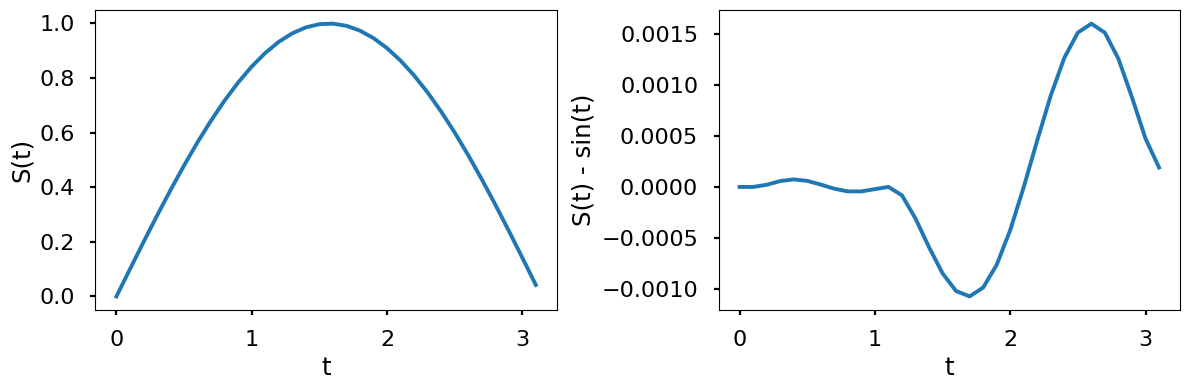

In [3]:
# EXAMPLE: Consider the ODE dS(t)/d(t) = cos(t). for an initial value of S0 = 0.
# The exact solution to this problem is S(t) = sin(t). Use solve_ivp to
# approximate the solution to this initial value problem over the interval
# [0, π ]. Plot the approximate solution versus the exact solution and the relative error over time.

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use("seaborn-poster")
%matplotlib inline
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()

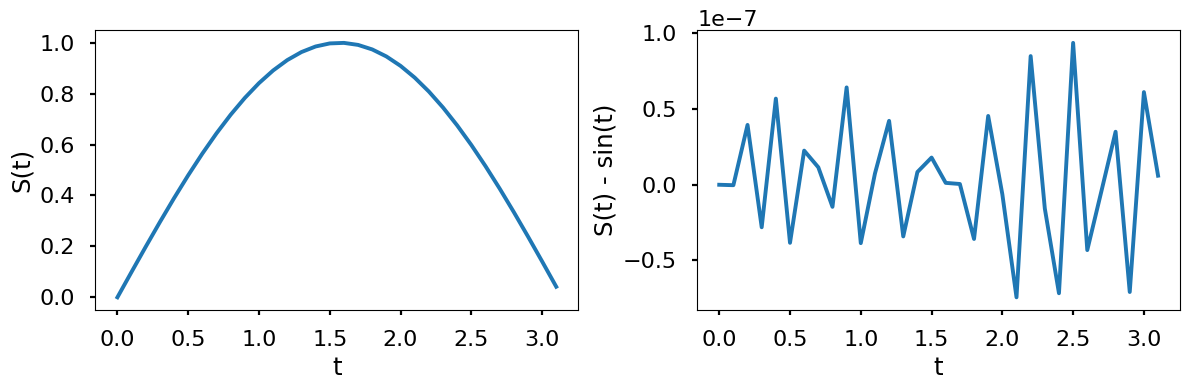

In [4]:
# Example: Using the rtol and atol to make the difference between the approximate
# and exact solution less than 1e-7.

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - sin(t)")
plt.tight_layout()
plt.show()

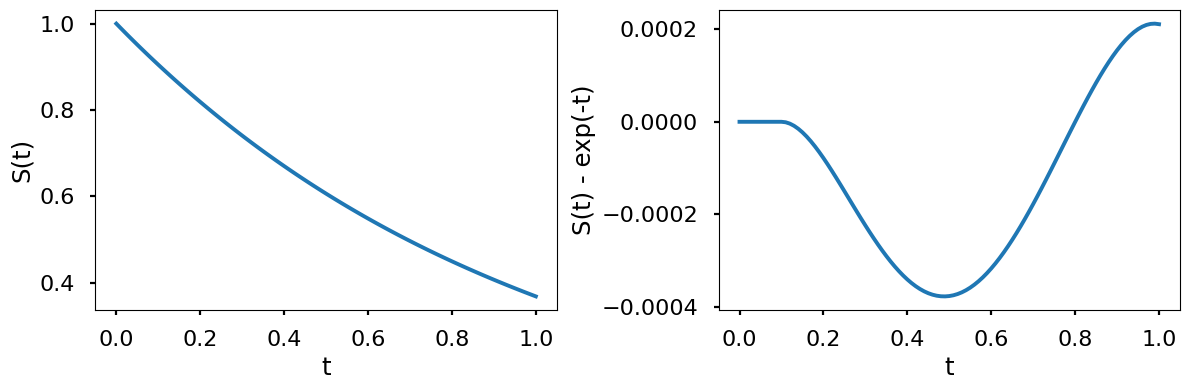

In [5]:
# Consider the ODE dS(t)/dt = -S(t), with an initial value of S0 = 1. The exact
# solution to this problem is S(t) = e^−t . Use solve_ivp to approximate the
# solution to this initial value problem over the interval [0, 1].
# Plot the approximate solution versus the exact solution, and the relative error over time.
#

F = lambda t, s: -s
t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel("t")
plt.ylabel("S(t)")
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel("t")
plt.ylabel("S(t) - exp(-t)")
plt.tight_layout()
plt.show()